# 线性表

> 什么是线性表:  

线性表是包含若干数据元素的一个线性序列  

线性表的特征:  

1. 对非空表，a0是表头，无前驱；  
2. an-1是表尾，无后继；  
3. 其他的每个元素ai有且仅有一个直接前驱ai-1和一个直接后继ai+1。  

## 顺序表

将线性表中的各元素依次存储于计算机一片连续的存储空间

### 顺序表的代码实现  
在C语言中，可借助于`一维数组`类型来描述线性表的顺序存储结构  

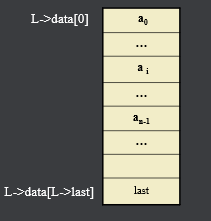

In [ ]:
#define N 100
typedef int data_t;
typedef struct
{
    data_t data[N];  //表的存储空间
    int last;        //标记表的最后元素的序号
}sqlist, *sqlink;

新建了一种数据结构sqlist,它占据一片连续的以int为单元(也可以指定别的)大小数据内存,另外还有一个int空间用于标记最后元素的位置  
同时也新建了一种结构体指针,用于访问表内的每个元素,也标记了表在内存中的位置  


这里对各种数据结构实现的实例都创建3个文件:  
.h文件          定义数据结构的结构体和实现的功能函数声明   
.c文件          各功能函数的具体实现    
test.c文件      应用实例  

**sqlist.h**

In [ ]:
typedef int data_t;
#define N 128

typedef struct
{
	data_t data[N];
	int last;
}sqlist, *sqlink;

// 注意返回值的类型
sqlink list_create();  								//顺序表创建函数
int list_clear(sqlink L); 							//顺序表清空函数
int list_free(sqlink L);  							//顺序表释放
int list_empty(sqlink L);  							//判断顺序表是否为空
int list_length(sqlink L); 							//求顺序表的长度
int list_locate(sqlink L, data_t value);			//定位顺序表中某一元素的位置 
int list_insert(sqlink L, data_t value, int pos);	//在顺序表中插入某一元素
int list_show(sqlink L);							//遍历打印顺序表中的元素
int list_itemdelete(sqlink L, int pos);				//删除顺序表中某一元素的位置
int list_merge(sqlink L1, sqlink L2);				//两个顺序表的合并
int list_purge(sqlink L);							//删除顺序表中的重复元素

**sqlist.c**

In [ ]:
#include <stdio.h>
#include "sqlist.h"
#include <stdlib.h>
#include <string.h>

/* 顺序表创建 */
sqlink list_create()  //创建不需要形参
{
	//malloc 申请内存,将数据放到堆上,动态内存分配，便于其他函数成员使用
	sqlink L;  							 	//L代表一个结构体指针变量
	L = (sqlink)malloc(sizeof(sqlist));  	//用malloc 申请一段大小为data「128」的内存 //将返回内存的首地址返回并强制转换成结构体指针类型
	if (L==NULL)							//如果没申请下来
	{
		printf("list malloc failed\n");
		return L;							//返回空
	}

	//initialize  初始化
	memset(L, 0, sizeof(sqlist));  			//把起始地址为L长度为sizeof的内存用0填充  起始 0 终止
	L -> last = -1;  						//这里-1这个异常值是用来表示线性表为空值
	//return      返回值
	return L;								//返回顺序表的首地址
}
/*顺序表的清空*/
int list_clear(sqlink L)					
{
	if (L == NULL) 							//如果连空间都没有申请下来
		return -1;							//直接返回异常值

	memset(L, 0, sizeof(sqlist)); 
	L -> last = -1;

	return 0;                       		//返回值0 只是清空,不用返回地址供以后使用
}
/*顺序表的释放*/
int list_free(sqlink L)
{
	if(L == NULL)
		return -1;
    
	free(L); 								//释放申请空间
	
    L = NULL;                               //将地址置空防止继续使用
	return 0;
}
/*判断顺序表是否为空*/
int list_empty(sqlink L)/
{
/*
 * list_empty: wheather the list is empty
 * para L: list
 * @ret 1--empty 0--not empty
 */
	if (L -> last == -1)					//如果last的值为－1
		return 1;
	else
		return 0;
}
/*求顺序表的长度*/
int list_length(sqlink L)
{
	if (L == NULL)
		return -1;
	return(L -> last + 1);                   //从0开始返回最后序号+1
}
/*顺序表元素定位*/
int list_locate(sqlink L, data_t value)
{
/*
* para    L: list
		  value:  the item
* @ret   -1  ---- not exist  
* 		 pos 
*/
	for (int i = 0; i <= L -> last; i++)	//从开头到结尾遍历每个元素
	{
		if ( L -> data[i] == value)			//如果值和第i个元素相同
			return i;						//返回i元素序号
	}
	return -1;								//如果没找到则返回异常值
}

int list_insert(sqlink L, data_t value, int pos)
{
/*顺序表元素插入
  参数:
  L : 创建的顺序表
  value : 要插入的元素
  pos : 插入的位置
*/
	if (L == NULL)
		return -1;

	// check wheather the list is full
	if (L -> last == N - 1)
	{
		printf("list is full\n");
		return -1;
	}

	// check para position  pos in [0, last+1]
	if (pos < 0 || pos > L -> last+1)
	{
		printf("Pos is invalid\n");
		return -1;
	}

	// move
	for (int i = L -> last; i >= pos; i--)     	//从最后一个元素开始操作，直到指定的元素
	{
		L -> data[i+1] = L -> data[i];			//把n放到n＋1
	}

	// update last
	L -> data[pos] = value;						//把值放到pos位置
	L -> last++;								//更新最后元素的位置

	return 0;
}
/*列出顺序表的元素*/
int list_show(sqlink L)
{
	if ( L == NULL)
		return -1;
	
	if ( L -> last == -1)
		printf("list is empty\n");

	for (int i = 0; i <= L -> last; i++)
	{
		printf("%d", L -> data[i]);
	}
	puts("");

	return 0;
}
/*删除顺序表中的某个位置的元素*/
int list_itemdelete(sqlink L, int pos)
{
	if ( L-> last == -1)
	{
		printf("list is empty\n");
		return -1;
	}
	//pos [0,last]
	if ( pos < 0 || pos > L->last)
	{
		printf("delete pos is invalid\n")
		return -1;
	}
	//move [pos+1, last]
	for (i = pos + 1; i <= L -> last; i++)			//从插入位置之后开始每个元素,都往前移
	{
		L -> data[i-1] = L -> data[i];				//用i替代i-1
	}
	//update
	L -> last--;
	return 0;
}
/*合并两个顺序表*/
int list_merge(sqlink L1, sqlink L2)
{
	int i = 0;
	int ret;
	while ( i <= L2 -> last)										//直到L2中最后一个元素
	{
		ret = list_locate(L1, L2 -> data[i]);						//在L1中查找L2中每个元素是否存在
		if ( ret == -1)//如果没找到
		{
	 		if(list_insert(L1, L2->data[i], L1 -> last+1) == -1)  	//把L2中的这个元素插入到L1结尾
			return -1;
		}
	  	i++;
	}
	return 0;
}
/*删除重复元素*/
int list_purge(sqlink L);
{
	int i;
	int j;
    
	if ( L -> last == 0)
		return 0;
	
    i = 1;														//创建i和j来操作两个元素
	while ( i <= L -> last)										//先选定一个i的位置,i应该遍历所有位置,以完成对所有元素的检查
	{
		j = i - 1;												//j从i之后的位置开始
		while ( j >= 0 )										//直到i之后没有一个元素和i重复
		{
			if ( L -> data[i] == Lo -> data[j])					//如果元素相等
			{

				list_delete(L, i);								//删掉i位置处的元素,补上元素继续比较
				break;
			}
			else
			{
				j--;											//j应当遍历i之后所有的位置
			}
		}
		if (j < 0)												//如果j都到最后也没有元素相等
		{
			i++;												//i就更新位置
		}
	}
}
int list_purge2(sqlink L)
{
	for(int i = 1; i <= L->last; )
	{
		for(int j = i - 1; j >= 0; j--)                 //j从i之前的位置开始遍历,依次取i之前所有的元素
		{
			if(L->data[i] == L->data[j])
			{
				list_delete(L, i);
				break;
			}
			if(j < 0)                                   //直到j已经无路可退
			{
				i++;                                    // 开始比较下一个i
			}
		}
	}

}

**test.c**

In [ ]:
#include <stdio.h>
#include "sqlist.h"

void test_insert();
void test_delete();
void test_merge();
void test_purge();

int main(int argc, const char *argv[])
{
	//test_insert();
	//test_delete();
	//test_merge();
	test_purge();

	return 0;
}

void test_insert() 
{
	sqlink L;
	
	L = list_create();
	if (L == NULL) 
		return;

	list_insert(L, 10, 0);
	list_insert(L, 20, 0);
	list_insert(L, 30, 0);
	list_insert(L, 40, 0);
	list_insert(L, 50, 0);
	list_insert(L, 60, 0);

	list_show(L);
	//list_insert(L, 100, list_length(L));
	list_insert(L, 100, -1000);
	list_show(L);
	list_free(L);
}

void test_delete() 
{
	sqlink L;
	
	L = list_create();
	if (L == NULL) 
		return;

	list_insert(L, 10, 0);
	list_insert(L, 20, 0);
	list_insert(L, 30, 0);
	list_insert(L, 40, 0);
	list_insert(L, 50, 0);
	list_insert(L, 60, 0);

	list_show(L);
	list_delete(L, 9);
	list_show(L);

	list_free(L);
}

void test_merge() {
	sqlink L1, L2;

	L1 = list_create();
	if (L1 == NULL) 
		return;

	L2 = list_create();
	if (L2 == NULL) 
		return;

	list_insert(L1, 10, 0);
	list_insert(L1, 20, 0);
	list_insert(L1, 30, 0);
	list_insert(L1, 40, 0);

	list_insert(L2, 50, 0);
	list_insert(L2, 20, 0);
	list_insert(L2, 90, 0);
	list_insert(L2, 40, 0);

	list_show(L1);
	list_show(L2);
	printf("********************\n");
	list_merge(L1, L2);
	list_show(L1);
	list_show(L2);
}

void test_purge() 
{
	sqlink L;
	
	L = list_create();
	if (L == NULL) 
		return;

	list_insert(L, 10, 0);
	list_insert(L, 10, 0);
	list_insert(L, 10, 0);
	list_insert(L, 10, 0);
	list_insert(L, 10, 0);
	list_insert(L, 10, 0);

	list_show(L);
	list_purge(L);
	list_show(L);

	list_free(L);
}


## 链表

### 单链表

+ 由于顺序表的插入删除操作需要移动大量的元素，影响了运行效率，因此引入了线性表的链式存储——单链表  
+ 单链表通过一组任意的存储单元来存储线性表中的数据元素，不需要使用连续的存储单元，因此它不要求在逻辑上相邻的两个元素在物理位置上也相邻  

+ 单链表的特点：
1. 单链表不要求逻辑上相邻的两个元素在物理位置上也相邻，因此不需要连续的存储空间
2. 单链表是非随机的存储结构，既不能直接找到表中某个特定的结点。查找某个特定的结点时，需要从表头开始遍历，依次查找。对于每个链表结点，除了存元素自身的信息外，还需要存放一个指向后继的指针



#### 单链表的代码实现  

In [ ]:
typedef struct node
{                           //定义单链表结点类型
    data_t data;            //数据域，可以是别的各种数据类型，本文同意用int类型
    struct node *next;      //指针域
}listnode, *linklist;
// 把结构体和结构体指针的定义用typedef简化

新建了一种数据结构listnode,它由两部分组成,一部分内存用于存储一个节点的数据data,另一部分存储指针next,指针的类型和这个节点一致,表示指向相同的数据节点   
 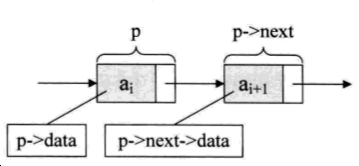

**linklist.h**

In [ ]:
typedef int data_t;

typedef struct node 
{										
	data_t data;
	struct node *next;  //指向结构体的指针,专门用来指向链表的结点
}listnode, * linklist;

linklist list_create();										//链表的创建
int list_head_insert(linklist H, data_t value);				//链表头部插入
int list_tail_insert(linklist H, data_t value);				//在尾部插入元素
linklist list_get(linklist H, int pos);						//获取某一结点的值 
int list_insert(linklist H, data_t value, int pos);			//在链表某一位置插入元素
int list_order_insert(linklist H,data_t value);				//链表的有序插入
int list_delete(linklist H,int pos);						//链表元素的删除
int list_show(linklist H);									//遍历打印链表每个元素的值
void list_reverse(linklist H);								//链表的倒置
void list_sort(linklist H);                                 //链表的排序
linklist list_free(linklist H); 							//链表空间的释放
linklist list_adjmax(linklist H, data_t *value);            //求相邻结点的最大值
int list_merge(linklist H1, linklist H2) 					//两个链表的合并

**linklist.c**

> 头结点

会在单链表的第一个结点之前附加一个结点，称为头结点

通常会用头指针来表示一个单链表，头指针为NULL时表示一个空表。  

头结点的数据域可以不设任何信息，也可以记录表长等信息。  

头结点的指针域指向线性表的第一元素结点。   

 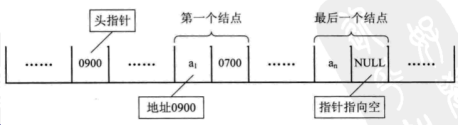  
 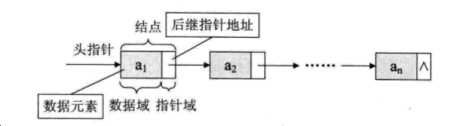

> 结点插入  

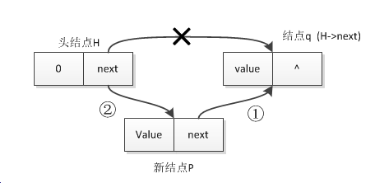  

(1和2步骤不能整反了，不然H->next指向的结点就丢失了)

> 链表的操作方法

1. 要操作新的节点，先要新建一个节点，包括申请内存空间，初始化(赋初值， 初始化next指针)
2. 新节点next指针 = 旧节点next指针   接后面
   旧节点next指针 = 新节点  接前面
3. 循环( p = p->next ) 遍历链表中的各个节点

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include "linklist.h"
/*链表创建*/
linklist list_create() 
{
	linklist H;											//创建头结点

	H = (linklist)malloc(sizeof(listnode));				//申请头结点内存
	if (H == NULL) 
	{
		printf("malloc failed\n");
		return NULL;
	}
	//赋初值	
	H->data = 0;										//数据结点为0
	H->next = NULL;										//next 结点为空

	return H;
}
/*链表头部插入*/
int list_head_insert(linklist H, data_t value)
{
    linklist p; 
    if((p=(linklist)malloc(sizeof(listnode)))==NULL) //1.申请空间
    {
    	printf("malloc failed\n");
    	return -1;
    }
    
	p->data = value;
    p->next = H->next;                //让P指向 本来是头的下一个结点
    H->next = p;                      //让头结点指向新插入的结点
    return 0;
}
/*链表尾部插入*/
int list_tail_insert(linklist H, data_t value) 
{
	linklist p;											//创建两个链表结点结构体指针用来操作结点
	linklist q;

	if (H == NULL) 
	{
		printf("H is NULL\n");
		return -1;
	}

	//1. 新建一个结点
	if ((p = (linklist)malloc(sizeof(listnode))) == NULL) 
	{													//申请一个结点的内存,并将首地址交给变量p保管
		printf("malloc failed\n");
		return -1;
	}
	p->data = value;									//将函数内的值交给结点的数据节点,用p来操作新建结点的内部
	p->next = NULL;                                     //新结点的next指向空,表示为末端结点
	
	//2. 定位尾部结点 
	q = H;												//用q指向链表的头结点
	while (q->next != NULL) 
	{
		q = q->next;									//q一直向后指，直到结尾
	}

	//3. 将新结点插入
	q->next = p;										//p操作的是新建的结点
														//让链表最后一个结点指向新节点的头

	return 0;
}
/*查找指定元素在链表中的位置*/
linklist list_get(linklist H, int pos) 
{
	linklist p;
	int i;

	if (H == NULL) 
	{
		printf("H is NULL\n");
		return NULL;
	}

	if (pos == -1)										//如果pos为-1，则返回头结点
	{
		return H;
	}

	p = H;												//从头开始操作
	i = -1;												//如果这里不写－1那下面的pos就写成pos＋1
	while (i < pos) 
	{
														//p一直向后读取，直到提供的位置
		p = p->next;
		
		if (p == NULL) 
		{
			printf("pos is invalid\n");
			return NULL;
		}
		
		i++;
	}

	return p;											//返回那个位置的结点地址
}
/*链表元素的插入*/
int list_insert(linklist H, data_t value, int pos) 
{
/*
para: H: 链表头结点
  value: 插入的值
  	pos: 插入的位置
*/
	linklist p;
	linklist q;

	if (H == NULL) 
	{
		printf("H is NULL\n");
		return -1;
	}

	//1. 定位位置P
	p = list_get(H, pos-1);
	if (p == NULL) 
	{
		return -1;
	}

	//2.新建结点q
	if ((q = (linklist)malloc(sizeof(listnode))) == NULL) 
	{
		printf("malloc failed\n");
		return -1;
	}
	q->data = value;
	q->next = NULL;

	//3.插入节点
	q->next = p->next;									//更新连接，先让原来的结尾变成新结点的结尾
	p->next = q;										//将原结点的结尾更新指向新结点的开头

	return 0;
}
/*链表有序插入*/
int list_order_insert(linklist H,data_t value)
{
	linklist p,q;
	//1. 新建节点
	if((p = (linklist)malloc(sizeof(listnode))) == NULL)
	{
		printf("malloc faied\n");
		return -1;
	}
	p->data = value;
	p->next = NULL;
    //2. 定位插入位置
	q = H;												
	while(q->next && q->next->data < value)	  		
	{
		q = q->next; 
	}

	p->next = q->next;
	q->next = p;
	
	return 0;
}
/*链表的删除*/
int list_delete(linklist H, int pos)
{
	linklist p, q;
	if(pos == 0) //说明是头结点
		p = H;
	else
		p = list_get(H, pos-1); //如果不是头结点，找到它的前一个结点
	
	if( p == NULL ||  p->next == NULL) //说明查找失败
	{
		printf("para is invalid\n");
		return -1;
	}
	else
	{
		q = p->next;     //需要先存到q不然ai结点就丢失了。
		p->next = q->next;
		free(q);         //释放内存
		q = NULL;        
		return 0;
	}
}
/*遍历打印链表的各个元素*/
int list_show(linklist H) 
{
	linklist p;

	if (H == NULL) 
	{
		printf("H is NULL\n");
		return -1;
	}

	p = H;													//将链表的头交由p指针

	while (p->next != NULL) 
	{
		printf("%d ", p->next->data);						//打印头结点之后一个数据结点的值
		p = p->next;										//p指向下一地址
	}
	puts("");

	return 0;
}
void list_reverse(linklist H)
{
    	linklist p,q;
    	p=H->next; 											//原链表一分为二
    H->next = NULL;
     
    	while(p)
    	{
    		q=p;  											//q暂存p的位置（此时p就可以后移动了）
    		p=p->next; 										//p负责向后移动来遍历链表
     
    		q->next = H->next;								//下面就是个头部插入的操作。
    		H->next = q;
    	}
}
void list_sort(linklist H)
{
	linklist p,q,r;
	p=H->next;
	H->next = NULL;
	while(p)
	{
		q=p;	
		p=p->next;
		r=H;
		while(r->next && r->next->data < q->data)
			r=r->next; //r来进行循环遍历
 
		q->next = r->next;//与头部插入操作是一样的，这是r后插入
		r->next = q;
	}
}
linklist list_free(linklist H) 
{
    linklist p;
 
    if (H == NULL) 
        return NULL;
 
    p = H;
 
    printf("free:");
    while (H != NULL) 
	{
        p = H;
        printf("%d ", p->data);
        free(p);
        H = H->next;
    }
    puts("");
 
    return NULL;
}
linklist list_adjmax(linklist H, data_t *value) 
{
    linklist p, q, r;
    data_t sum;
 
    if (H == NULL)
	{
        printf("H is NULL\n");
        return NULL;
    }
 
    if (H->next == NULL || H->next->next == NULL || H->next->next->next == NULL) 
	{
        return H;
    }
 
    q = H->next;
    p = H->next->next;//p = q->next;
    r = q;
    sum = q->data + p->data;
 
    while (p->next != NULL) 
	{
        p = p->next;
        q = q->next;
        if (sum < q->data + p->data) 
		{
            sum = q->data + p->data;
            r = q;
        }
    }
 
    *value = sum;
 
    return r;
}
int list_merge(linklist H1, linklist H2) 
{
    linklist p, q, r;
     
    if (H1 == NULL || H2 == NULL) 
	{
        printf("H1 || H2 is NULL\n");
        return -1;
    }
     
    p = H1->next;
    q = H2->next;
    r = H1;
    H1->next = NULL;
    H2->next = NULL;
     
    while (p && q) 
	{
        if (p->data <= q->data) 
		{
            r->next = p;
            p = p->next;
            r = r->next;
            r->next = NULL;
        }
		else 
		{
            r ->next = q;
            q = q->next;
            r = r->next;
            r->next = NULL;
        }
    }
     
    if (p == NULL) 
	{
        r->next = q;
    }
	else 
	{
        r->next = p;
    }
     
    return 0;
}

**test.c**

In [ ]:
#include <stdio.h>
#include "linklist.h"

void test_get();

int main(int argc, const char *argv[])
{
	linklist H;
	int value;
	
	H = list_create();
	if (H == NULL)
		return -1;

	printf("input:");
	while (1) {
		scanf("%d", &value);
		if (value == -1)
			break;
		list_tail_insert(H, value);
		printf("input:");
	}
	
	list_show(H);
	list_insert(H, 100, 0);//1 3 5 7
	list_show(H);

	return 0;
}

void test_get() {
	linklist H;
	int value;
	linklist p;
	
	H = list_create();
	if (H == NULL)
		return;

	printf("input:");
	while (1) {
		scanf("%d", &value);
		if (value == -1)
			break;
		list_tail_insert(H, value);
		printf("input:");
	}
	
	list_show(H);

	p = list_get(H, 4);//1 3 5 7
	if (p != NULL)
		printf("value=%d\n", p->data);


}

### 循环链表

在单链表中我们只存储了向后的指针，到达尾标志就停止了。我们可以通过一个结点找到后结点，但是无法找到前结点了。   

如果我们将尾结点的指针域指向头结点，一个单链表就形成了一个环，这种链表叫循环链表。   
（主要解决单链表的问题：从任意结点出发，可以访问到链表的全部结点）    
（我们的环线地铁，不管你从哪一站上车，都能从整个环线的任意位置下车）  

循环链表不一定要有头结点，但是为了使空链表和非空链表处理一致，通常加一个头结点。   

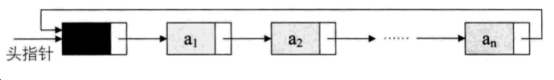  

单链表通过p->next ==NULL 来判断链表是否结束  
循环链表 p->next ==头结点 来判断链表是否结束  

#### 单向循环链表

单向循环链表就是在单链表的基础上，将尾结点的指针域指向了头结点，形成了一个环，很好理解。

举个应用的例子，理解一下和单链表的异同就可以了

实现结点数目指定为N的单向循环链表，要求包含头结点（发现并没什么新知识点）

In [ ]:
linklist list_create()
{
    linklist H,r,p;
    int n,i;
loop:
    printf("please input n:");
    scanf("%d",&n);
    if(n<0)
    {
    	printf("please input:n>0\n");
    	goto loop;
    }
    if((H=(linklist)malloc(sizeof(listnode)))==NULL)
    {
    	printf("malloc failed!\n");
    	return H;
    }
    H->data = 1;
    H->next = H;
    r=H; //上面这么多步骤就先做了一些输入参数的判断和创建了一个只有头结点的单链表
    	
    for(i=2;i<=n;i++)  //实现了一个尾结点的插入，r跟屁虫总是指向尾结点
    {
    	if((p=(linklist)malloc(sizeof(listnode)))==NULL)
		{
    		printf("malloc failed\n");
    		return NULL;
    	}
    		p->data = i;
    		r->next = p;
    		r=p;
    	}
    	p->next = H; //循环链表的特殊之处，形成环     
    	return H;
}

#### 双向循环链表

虽然通过循环链表，能够找到上一结点，但是需要再遍历一遍，很费时间，于是出现了双向链表。

双向链表（在单链表基础上在增加一个前驱结点的指针域）  
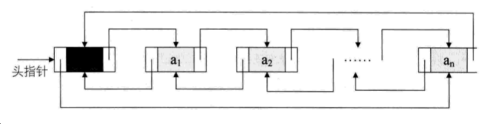

双向链表在求长度，查找元素，获取元素等和单链表相同，操作一个方向的指针就好。

但是双向链表在获得遍历的同时，插入和删除也要费劲一点，需要更改两个指针的变量。

1.插入操作（注意操作步骤）  
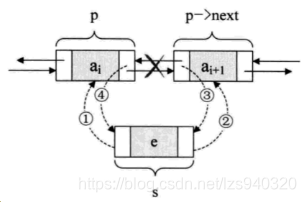  
有了顺序就很好做操作了，  
q = p->next

s->prior = p

s->next = q

q->prior = s

p->next = s   

2.删除操作  
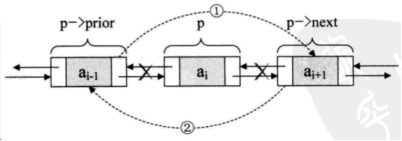  
H = p->prior 

q =p->next

则  

H->next = q

q->prior = H

In [ ]:
typedef int data_t; //方便替换数据类型
typedef struct node
{
    data_t data; //数据域
    struct node *prior;//指向上一个结点
    struct node *next;//指针域，指向下一个结点 
}dlistnode;

3.双向循环链表的创建（只有头结点）

In [ ]:
if((H=(dlistnode *)malloc(sizeof(dlistnode)))==NULL)
{
    puts("malloc failed");
    return NULL;
}
    H->prior = H; //自己指向自己
    H->next = H;


4.双向循环链表的遍历

In [ ]:
void dlist_show(dlistnode* H)
{
    dlistnode *p;
    p=H->next;
    while(p!=H)  //表示循环链表结束
    {
    	printf("%d ",p->data);
    	p=p->next;
    }
}

5.通过编号查找

In [ ]:
dlistnode* dlist_get(dlistnode *H,int pos)
{
    int i=-1;
    dlistnode *p=H;
     
    if(pos <0)
    {
    	puts("pos < 0,invalid!");
    	return NULL;
    }
    while(i<pos)
    {
    	p=p->next;
    	i++;
    	if(p==H)
        {
    		puts("pos > length,invalid");
    		return NULL;
    	}
    }
    return p;
}

## 栈

+ 背景:
之前学习递归函数的时候，我们都会强调要有结束条件，不然函数调用子函数，子函数再调用孙函数一层层调用过程中就需要用到栈，通过栈来**保存现场（参数局部变量，返回地址等）**，执行到最后语句的时候，再以存储的逆序恢复现场一旦没有结束条件，就会导致内存占用越来越多，然后内存溢出。
+ 概念：
栈是限定仅在表尾进行插入和删除操作的线性表  
后入先出的线性表  
我们把允许插入（压栈）和删除（出栈）的一端称为栈顶（top）,另一端称为栈底（bottom）  
注：为了操作方便，我们将数组的尾部作为栈顶，头部作为栈底。  

从栈的定义上可以看到，它是对插入和删除的位置进行了限制，并没有对元素的进出的时间进行限制（只要保证是栈顶出栈，先进去的元素也可以出栈）  
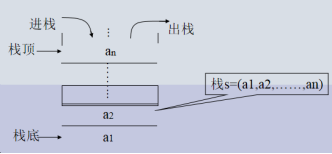
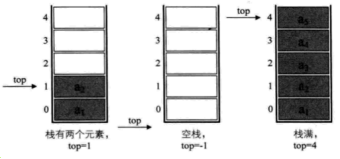

### 顺序栈

顺序栈的实现:  
+ 在给顺序栈申请空间时需要分开申请内存    
（1）需要申请一个栈空间存放三个成员，数据成员在这里只出现其空间的指针(顺序表)  
（2）所以还需要data申请空间去存储用户需要存放数据所需的空间，如图所示：  
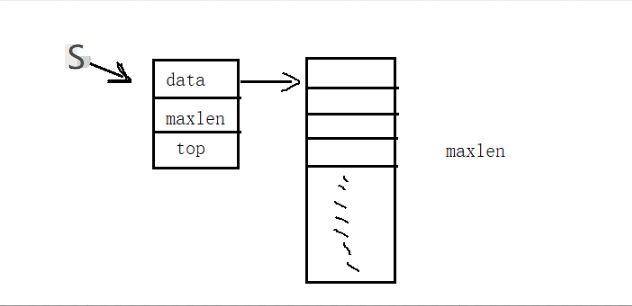
如果只实现固定长度的顺序栈则不需要分再次申请内存空间   

In [ ]:
typedef int data_t;   //定义栈中数据元素的数据类型
typedef struct
{
    data_t *data;     //用指针指向栈的存储空间  注意这里并没有直接将数据所需的空间直接放进来
    int maxlen;       //当前栈的最大元素个数
    int top;          //只是栈顶位置（数组下标）的
}sqstack;              //顺序栈类型定义

In [ ]:
typedef int data_t;
typedef struct
{
    data_t data[MAXSIZE];
    int top;                              //栈顶指针
}sqstack_t;

**sqstack.h**

In [ ]:
typedef int data_t;
typedef struct 
{
	data_t *data;
	int maxlen;
	int top;
}sqstack;

sqstack * stack_create(int len);                            //顺序栈的创建
int stack_push(sqstack * s, data_t value);                  //压栈
int stack_empty(sqstack *s);                                //栈的清空
int stack_full(sqstack *s);                                 //判断是否为满
data_t stack_pop(sqstack *s);								//压栈
data_t stack_top(sqstack *s);								//出栈
int stack_clear(sqstack *s);								//栈的清空
int stack_free(sqstack *s);									//栈的释放                                                                                                                   

**sqstack.c**

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include "sqstack.h"


/*栈的创建*/
sqstack * stack_create(int len) 
{
/*
para : len 创建栈需要指定创建顺序表的长度

*/
	sqstack * s;             //创建顺序栈指针,用于操作栈
/*需要分两步申请内存*/
	if ((s =(sqstack *)malloc(sizeof(sqstack))) == NULL) //给顺序栈申请内存空间
	{
		printf("malloc sqstack failed\n");
		return NULL;
	}

	if ((s->data = (data_t *)malloc(len * sizeof(data_t)))==NULL) //给data申请内存,注意这里的data是一个指针
	{
		printf("malloc data failed\n");
		free(s);
		return NULL;
	}
/*初始化data*/
	memset(s->data, 0, len*sizeof(data_t));
	s->maxlen = len;
	s->top = -1;								//top为-1代表栈为空

	return s;
}
/*压栈*/
int stack_push(sqstack * s, data_t value) 
{
	if (s == NULL) 
	{
		printf("s is NULL\n");
		return -1;
	}
//判断栈是否为空
	if (s->top == s->maxlen-1) 					
	{
		printf("stack is full\n");
		return -1;
	}

	s->top++;										//栈顶更新
	s->data[s->top] = value;						//将元素放入栈顶 

	return 0;
}
/*判断栈是否为空*/
int stack_empty(sqstack *s) 
{

	if (s == NULL) 
	{
		printf("s is NULL\n");
		return -1;
	}
	return (s->top == -1 ? 1 : 0);					//如果栈顶为空返回1,否则返回0
}
/*判断栈是否满*/
int stack_full(sqstack *s) 
{
	if (s == NULL) 
	{
		printf("s is NULL\n");
		return -1;
	}
	return  (s->top == s->maxlen-1 ? 1 : 0);          //如果栈顶元素为最大序号返回1,否则返回0
}
/*出栈*/
data_t stack_pop(sqstack *s) 
{
	s->top--;										 	//栈顶减1
	return (s->data[s->top+1]);							//返回
}
/*读取栈顶元素*/
data_t stack_top(sqstack *s) 
{
	return (s->data[s->top]);
}
/*栈清空*/
int stack_clear(sqstack *s) 
{
	if (s == NULL) 
	{
		printf("s is NULL\n");
		return -1;
	}	
	s->top = -1;
	return 0;
}
/*栈的空间释放*/
int stack_free(sqstack *s) 
{
	if (s == NULL) 
	{
		printf("s is NULL\n");
		return -1;
	}
	//释放需要2次
	if (s->data != NULL) 
		free(s->data);
	free(s);

	return 0;
}

**test.c**

In [ ]:
#include <stdio.h>
#include "sqstack.h"

int main(int argc, const char *argv[])
{
	sqstack *s;

	s = stack_create(100);
	if (s == NULL) 
		return -1;

	stack_push(s, 10);
	stack_push(s, 20);
	stack_push(s, 30);
	stack_push(s, 40);

	while (!stack_empty(s)) 
    {
		printf("pop: %d \n", stack_pop(s) );
	}
	
	stack_free(s);

	return 0;
}

### 链式栈

+ 链式栈的实现   
插入操作和删除操作均在链表头部进行，链表尾部就是栈底，栈顶指针就是头指针。   
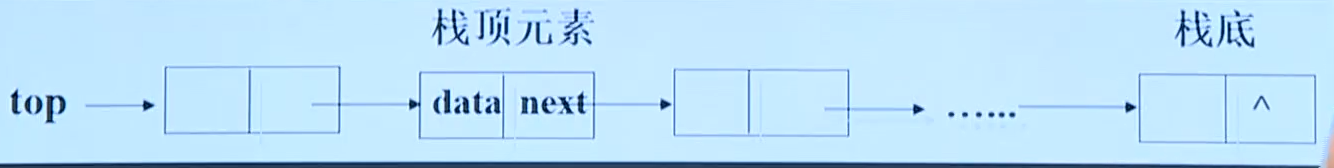  
+ 入栈操作:  
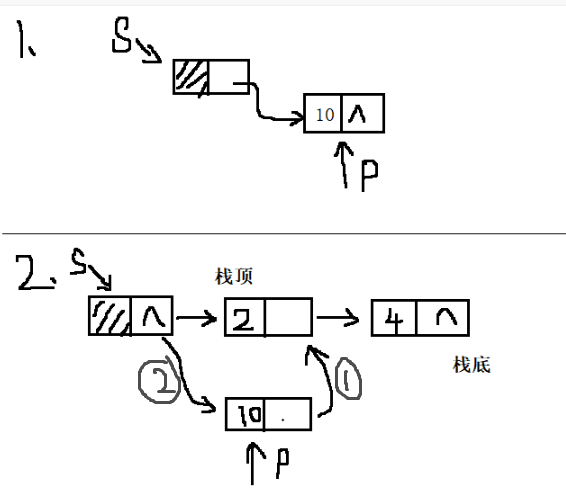  
+ 出栈操作:  
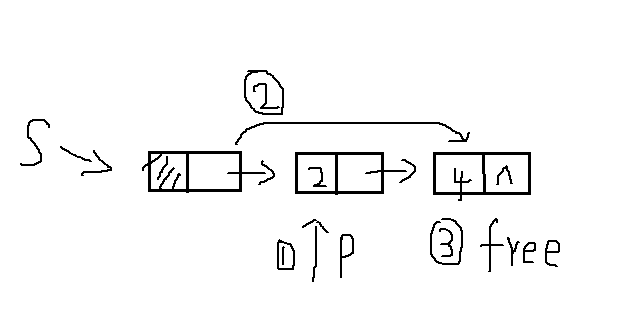  

In [ ]:
typedef int data_t;       //定义栈中数据元素数据类型
typedef struct node
{
    data_t data;           //数据域       这里直接指明了一个节点的大小
    struct node *next;      //链接指针域
}listnode, *linktack;       //链栈类型定义

**linkstack.h**

In [ ]:
typedef int data_t;

typedef struct node 
{
	data_t data;
	struct node *next;
}listnode, *linkstack;

linkstack stack_create();
int stack_push(linkstack s, data_t value);
data_t stack_pop(linkstack s);
int stack_empty(linkstack s);
data_t stack_top(linkstack s);
linkstack stack_free(linkstack s);

**linkstack.c**

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include "linkstack.h"
/*栈的创建*/
linkstack stack_create() 
{
	linkstack s;

	s = (linkstack)malloc(sizeof(listnode));  //申请一个节点的内存
	if (s == NULL) 
	{
		printf("malloc failed\n");
		return NULL;
	}
	s->data = 0;								//初始化
	s->next = NULL;

	return s;
}
/*压栈*/
int stack_push(linkstack s, data_t value) 
{
	linkstack p;

	if (s == NULL) 
	{
		printf("s is NULL\n");
		return -1;
	}

	p = (linkstack)malloc(sizeof(listnode));
	if (p == NULL) 
	{
		printf("malloc failed\n");
		return -1;
	}
	p->data = value;
	//p->next = NULL;
	p->next = s->next;
	s->next = p;

	return 0;
}
/*出栈*/
data_t stack_pop(linkstack s) 
{
	linkstack p;
	data_t t;

	p = s->next;
	s->next = p->next;

	t = p->data;

	free(p);
	p =NULL;

	return t;
}
/*判断栈是否为空*/
int stack_empty(linkstack s) 
{
	if (s == NULL) 
	{
		printf("s is NULL\n");
		return -1;
	}

	return (s->next == NULL ? 1 : 0);
}
/*出栈*/
data_t stack_top(linkstack s) 
{
	return (s->next->data);
}
/*栈的清空*/
linkstack stack_free(linkstack s) 
{
	linkstack p;

	if (s == NULL) 
	{
		printf("s is NULL\n");
		return NULL;
	}

	while (s != NULL) 
	{
		p = s;
		s = s->next;
		printf("free:%d\n", p->data);
		free(p);
	}

	return NULL;
}

**test.c**

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include "linkstack.h"

int main(int argc, const char *argv[])
{
	linkstack s;

	s = stack_create();
	if (s == NULL) 
		return -1;

	stack_push(s, 10);
	stack_push(s, 20);
	stack_push(s, 30);
	stack_push(s, 40);

#if 0
	while (!stack_empty(s)) {
		printf("pop:%d\n", stack_pop(s));
	}
#endif

	s = stack_free(s);
	
	return 0;
}

## 队列